### Goal in this competition is to locate microvasculature structures (blood vessels) within human kidney histology slides.

**Data used in a competition or dataset is derived from* five *Whole Slide Images (WSI), which are large digital images typically used in medical imaging. These WSI images have been divided or split into smaller sections called "tiles."**



### Importing modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import json
import glob
import PIL
import IPython.display

### Importing datasets

In [3]:
# We have images folder provide as Input in Kaggle Notebook itself
# We don not need to customly import images one by one or download the whole dataset
train_tiles = glob.glob('/kaggle/input/hubmap-hacking-the-human-vasculature/train/*.tif')

train_tiles.sort()

In [4]:
tile1, tile2, tile3 = plt.imread(train_tiles[708]),plt.imread(train_tiles[7]), plt.imread(train_tiles[7008])
tile1.shape, tile2.shape, tile3.shape

((512, 512, 3), (512, 512, 3), (512, 512, 3))

In [5]:
polygons = pd.read_json('/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl', lines=True)

In [6]:
co_ord_for_0006ff2aa7cd =  polygons.loc[0].annotations

In [7]:
image = cv.imread('/kaggle/input/hubmap-hacking-the-human-vasculature/train/0033bbc76b6b.tif')

In [8]:
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [9]:
grayscale_image = grayscale_image/255   # Converting in RANGE of 0 - 1
grayscale_image = grayscale_image.astype(np.uint8)


In [10]:
def masking(image) :
    annot =  polygons.loc[4].annotations
    masked_image = np.zeros_like(image)
    
    for index in range(0, len(annot)) :
        if annot[index]['type'] == ('blood_vessel')   :

            for ind in range(0, len(annot[index]['coordinates'][0])) :

                x, y = annot[index]['coordinates'][0][ind][0], annot[index]['coordinates'][0][ind][1]
                masked_image[x][y] = 1
                
    return masked_image
    


In [11]:
masked_image = masking(grayscale_image)

### We got boundaries by using polygon.jsonl, now us contours to fill those with one


In [12]:
# Find the contours of the binary mask
contours, _ = cv.findContours(masked_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(masked_image, contours, -1, 1, thickness=cv.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

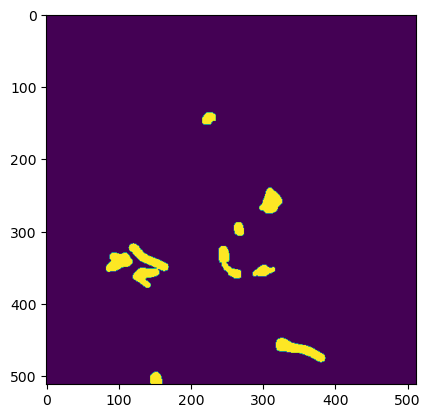

In [13]:
plt.imshow(masked_image)